<a href="https://colab.research.google.com/github/Facco-Bruno/python-codes/blob/main/Escalonador_Rate_Monotonic_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Escalonador Rate Monotonic em Python**

Desenvolvimento de uma interface gráfica demonstrando o processo de escalonamento to tipo Rate Monotonic utilizando a linguagem Python


## Bibliotecas

In [46]:
# Bibliotecas
import copy
from sys import *
from math import gcd
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from collections import defaultdict

## Variáveis

In [47]:
# Criação dos Dicionários

tasks = dict()
RealTime_task = dict()
metrics = defaultdict(dict)
d = dict()
dList = []
T = []
C = []
U = []

# Variaveis do Grafico de Gantt
y_axis  = []
from_x = []
to_x = []

## Função de entrada de dados

In [48]:
# Função para leitura de dados

def Ler_dados():

	global n
	global hp
	global tasks
	global dList

	dList = {}

	n = int(input("Entre com o número de Tasks: \n"))
 
	# Padrão do Dicionario

	for i in range(n):
		dList["Tarefa_%d"%i] = {"start":[],"finish":[]}

	dList["Tarefa_Ociosa"] = {"start":[],"finish":[]}

	for i in range(n):
   
		tasks[i] = {}

		print("Entre com o Período da Tarefa",i,":")
		p = input()
  
		tasks[i]["Periodo"] = int(p)
  
		print("Entre com o Tempo de Comutação",i,":")
		w = input()
  
		tasks[i]["Comut"] = int(w)


## Função para calcular período total

In [49]:
# Função para calcular o período total

def Periodototal():

	temp = []

	for i in range(n):
		temp.append(tasks[i]["Periodo"])
  
	HP = temp[0]

	for i in temp[1:]:
		HP = HP*i//gcd(HP, i)
  
	print("Periodo Total:", HP,'\n')

	return 2*HP

## Função para verificar se o sistema é escalonável ou não

In [50]:
# Função que define o escalonamento dos processos

def Escalonavel():

	for i in range(n):
   
		T.append(int(tasks[i]["Periodo"]))
		C.append(int(tasks[i]["Comut"]))
		u = int(C[i])/int(T[i])
		U.append(u)

	U_factor = sum(U)
 
	if U_factor<=1:
    
		print("Fator de Utilização: ",U_factor, "\n")

		sched_util = n*(2**(1/n)-1)
  
		print("Checando Condições:",sched_util, '\n')

		count = 0
		T.sort()
  
		for i in range(len(T)):
			if T[i]%T[0] == 0:
				count = count + 1

		# Verificando as Condições de Escalonamento

		if U_factor <= sched_util or count == len(T):
    
			print("Tarefas são escaláveis pelo Rate Monotonic Escalonamento! \n")
			return True

		else:
			print("Tarefas não são escaláveis pelo Rate Monotonic Escalonamento! \n")
			return False

	print("Sobrecarregamento de Tarefas! \n ")
	print("Fator de Utilização > 1 \n")
 
	return False

## Função para calcular a prioridade

In [51]:
# Função para cálculo da prioridade

def Prioridade(RealTime_task):
	
	tempPeriod = hp
	P = -1    
  
	for i in RealTime_task.keys():
   
		if (RealTime_task[i]["Comut"] != 0):
    
			if (tempPeriod > RealTime_task[i]["Periodo"] or tempPeriod > tasks[i]["Periodo"]):
				tempPeriod = tasks[i]["Periodo"]
				P = i

	return P

## Simulação

In [52]:
# Função que organiza o funcionamento dos processos

def Simulacao(hp):

	global RealTime_task
	RealTime_task = copy.deepcopy(tasks)

	for i in RealTime_task.keys():
		RealTime_task[i]["DCT"] = RealTime_task[i]["Comut"]

		if (RealTime_task[i]["Comut"] > RealTime_task[i]["Periodo"]):
			print("A tarefa não pode ser completa no tempo! \n", i )

	# Loop principal
	for t in range(hp):

		# Determina a prioridade das tarefas
		priority = Prioridade(RealTime_task)

    # Processo não está ocioso
		if (priority != -1):
    
			print("t{}-->t{} :Tarefa_{} \n".format(t,t+1,priority))
   
			RealTime_task[priority]["Comut"] -= 1

			dList["Tarefa_%d"%priority]["start"].append(t)
			dList["Tarefa_%d"%priority]["finish"].append(t+1)
   
			# Configurando Gantt
			y_axis.append("Tarefa%d"%priority)
			from_x.append(t)
			to_x.append(t+1)

    # Processo está ocioso 
		else:    
  
			print("t{}-->t{} :Ocioso \n".format(t,t+1))
   
			dList["Tarefa_Ociosa"]["start"].append(t)
			dList["Tarefa_Ociosa"]["finish"].append(t+1)
   
			# Configurando Gantt
			y_axis.append("Ocioso")
			from_x.append(t)
			to_x.append(t+1)

		for i in RealTime_task.keys():
			RealTime_task[i]["Periodo"] -= 1

			if (RealTime_task[i]["Periodo"] == 0):
				RealTime_task[i] = copy.deepcopy(tasks[i])


## Desenhar GANT

In [53]:
# Função para plotar o gráfico de GANTT

def Gantt():
	
	  colors = ['red','green','blue','orange','yellow']
	  fig = plt.figure(figsize=(15,5))  # Define o tamanho da figura (largura, altura)
	  ax = fig.add_subplot(111)
	  ax = plt.hlines(y_axis, from_x, to_x, linewidth=20, color = colors[n-1]) # Configurando Eixo Y (valores, xmin, xmax)
	  plt.title('Escalonamento Rate Monotonic')
	  plt.grid(True)
	  plt.xlabel("Clock em Tempo Real")
	  plt.ylabel("ALTA------------------Prioridade--------------------->BAIXA")
	  plt.xticks(np.arange(min(from_x), max(to_x)+1,1)) # Configurando Eixo X, último parametro define o passo do eixo x
	  plt.show()

## Main


_RATE MONOTONIC ESCALONADOR_

Entre com o número de Tasks: 
3
Entre com o Período da Tarefa 0 :
5
Entre com o Tempo de Comutação 0 :
2
Entre com o Período da Tarefa 1 :
10
Entre com o Tempo de Comutação 1 :
2
Entre com o Período da Tarefa 2 :
20
Entre com o Tempo de Comutação 2 :
3
Fator de Utilização:  0.7500000000000001 

Checando Condições: 0.7797631496846196 

Tarefas são escaláveis pelo Rate Monotonic Escalonamento! 

Periodo Total: 20 

t0-->t1 :Tarefa_0 

t1-->t2 :Tarefa_0 

t2-->t3 :Tarefa_1 

t3-->t4 :Tarefa_1 

t4-->t5 :Tarefa_2 

t5-->t6 :Tarefa_0 

t6-->t7 :Tarefa_0 

t7-->t8 :Tarefa_2 

t8-->t9 :Tarefa_2 

t9-->t10 :Ocioso 

t10-->t11 :Tarefa_0 

t11-->t12 :Tarefa_0 

t12-->t13 :Tarefa_1 

t13-->t14 :Tarefa_1 

t14-->t15 :Ocioso 

t15-->t16 :Tarefa_0 

t16-->t17 :Tarefa_0 

t17-->t18 :Ocioso 

t18-->t19 :Ocioso 

t19-->t20 :Ocioso 

t20-->t21 :Tarefa_0 

t21-->t22 :Tarefa_0 

t22-->t23 :Tarefa_1 

t23-->t24 :Tarefa_1 

t24-->t25 :Tarefa_2 

t25-->t26 :Tarefa_0 

t26-->t27

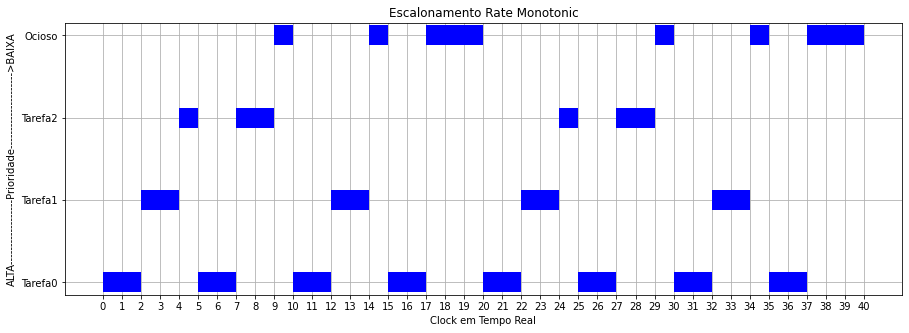

In [54]:

print("\n_RATE MONOTONIC ESCALONADOR_\n")

Ler_dados()
sched_res = Escalonavel()
 
if sched_res == True:

	hp = Periodototal()
	Simulacao(hp)
	Gantt()

else:

	Ler_dados()
	sched_res = Escalonavel()
